In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# load dataset 

In [13]:
import os

folder = r"C:\Users\DELL\OneDrive\Desktop\dataset\archive (8)"
print(os.listdir(folder))

['test_data.csv', 'training_data.csv']


In [16]:
#train data
df_train=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\dataset\archive (8)")
df_train

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\DELL\\OneDrive\\Desktop\\dataset\\archive (8)'

# Unique Values

In [10]:
df_train["label"].unique()

NameError: name 'df_train' is not defined

In [ ]:
df_train["label"].value_counts()

label
2    30000
3    30000
1    30000
0    30000
Name: count, dtype: int64

In [ ]:
# map the categorical labels to text
category_mapping={0:"world",1:"sports",2:"Business",3:"sci/tech"}
df_train["label_map"]=df_train["label"].map(category_mapping)

In [ ]:
df_train

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business
...,...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0,world
119996,Renteria signing a top-shelf deal Red Sox gene...,1,sports
119997,Saban not going to Dolphins yet The Miami Dolp...,1,sports
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1,sports


In [ ]:
# mapping labels to text
df_train["label_map"].value_counts()

label_map
Business    30000
sci/tech    30000
sports      30000
world       30000
Name: count, dtype: int64

In [ ]:
# drop duplicates
unique_new = df_train.drop_duplicates(subset=['label'])
unique_new

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
78,"'Madden,' 'ESPN' Football Score in Different W...",3,sci/tech
448,"Phelps, Thorpe Advance in 200 Freestyle (AP) A...",1,sports
492,Venezuelans Vote Early in Referendum on Chavez...,0,world


In [ ]:
for _row in unique_new.itertuples():
    print(f"Topic: {_row.label} \nText: {_row.text}\n")
print(f"Total number of unique samples: {unique_new.shape[0]}")
df_train

Topic: 2 
Text: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Topic: 3 
Text: 'Madden,' 'ESPN' Football Score in Different Ways (Reuters) Reuters - Was absenteeism a little high\on Tuesday among the guys at the office? EA Sports would like\to think it was because "Madden NFL 2005" came out that day,\and some fans of the football simulation are rabid enough to\take a sick day to play it.

Topic: 1 
Text: Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster than the teenager in the 200 free preliminaries.

Topic: 0 
Text: Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans tu

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business
...,...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0,world
119996,Renteria signing a top-shelf deal Red Sox gene...,1,sports
119997,Saban not going to Dolphins yet The Miami Dolp...,1,sports
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1,sports


In [ ]:
df_train["label_map"].unique()

array(['Business', 'sci/tech', 'sports', 'world'], dtype=object)

C:\Users\Mahalakshmi S\AppData\Local\Temp\ipykernel_2052\2088157451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_map', data=df_train, palette="Set2")


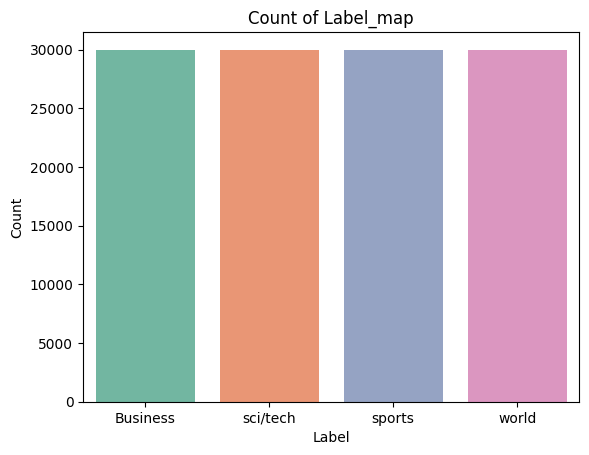

In [ ]:
# Count plot for the 'label_map' column
sns.countplot(x='label_map', data=df_train, palette="Set2")

# Add labels and title
plt.title('Count of Label_map')
plt.xlabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
# word cloud
from wordcloud import WordCloud

In [ ]:
my_text=" ".join(df_train["text"].astype(str))

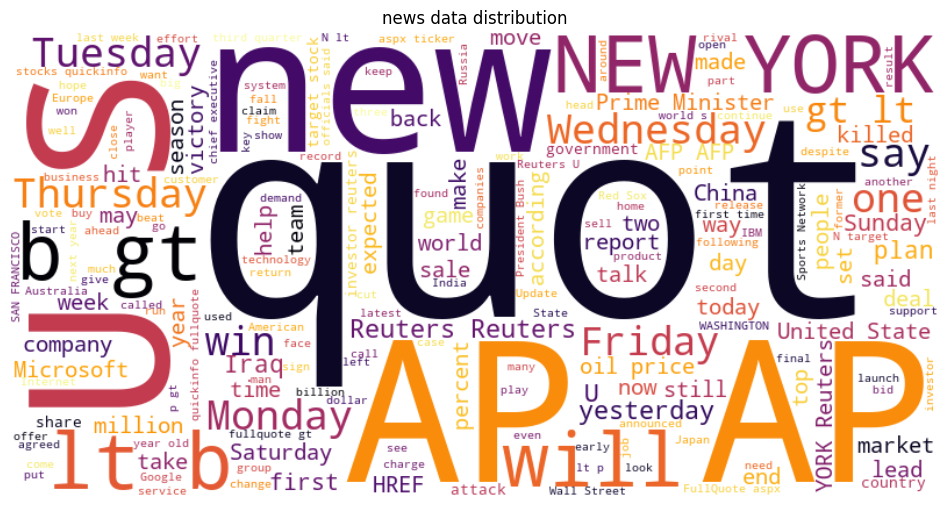

In [ ]:
wordcloud=WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="inferno",
    stopwords=None
).generate(my_text)
plt.figure(figsize=(12,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("news data distribution")
plt.show()

## use this for text data cleaning for any file save this

In [ ]:
import re,string
def data_cleaning(text):
    text = text.lower() #lower_case the text
    text = re.sub('\[.*?\]', '', text) #remove brackets and words
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls
    text = re.sub('<.*?>+', '', text) #remove html tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)# remove punctuationz
    text = re.sub('\n', '', text) #remove newline characters from the text.
    text = re.sub('\w*\d\w*', '', text) #remove digits
    text=re.sub(r'[^\x00-\x7F]+', '', text) # remove emoji
    return text

In [ ]:
df_train.head()

,text,label,label_map
0,Wall St. Bears Claw Back Into the Black (Reute...,2,Business
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,Business
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,Business
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,Business
4,"Oil prices soar to all-time record, posing new...",2,Business


In [ ]:
df_train["text"]=df_train["text"].apply(data_cleaning)
df_train.head()

,text,label,label_map
0,wall st bears claw back into the black reuters...,2,Business
1,carlyle looks toward commercial aerospace reut...,2,Business
2,oil and economy cloud stocks outlook reuters r...,2,Business
3,iraq halts oil exports from main southern pipe...,2,Business
4,oil prices soar to alltime record posing new m...,2,Business


# tokenization

In [ ]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import nltk
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Mahalakshmi
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Mahalakshmi
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk import word_tokenize

In [ ]:
df_train["text"] = df_train["text"].apply(word_tokenize)
df_train.head()

,text,label,label_map
0,"[wall, st, bears, claw, back, into, the, black...",2,Business
1,"[carlyle, looks, toward, commercial, aerospace...",2,Business
2,"[oil, and, economy, cloud, stocks, outlook, re...",2,Business
3,"[iraq, halts, oil, exports, from, main, southe...",2,Business
4,"[oil, prices, soar, to, alltime, record, posin...",2,Business


# stop words 
eg: the ,is ,in ,at ,on

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mahalakshmi
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def stop_words(text):
    stop_words=set(stopwords.words("english"))
    text =[words for words in text if words not in stop_words ]
    
    return text

In [ ]:
df_train["text"]=df_train["text"].apply(stop_words)
df_train.head()

,text,label,label_map
0,"[wall, st, bears, claw, back, black, reuters, ...",2,Business
1,"[carlyle, looks, toward, commercial, aerospace...",2,Business
2,"[oil, economy, cloud, stocks, outlook, reuters...",2,Business
3,"[iraq, halts, oil, exports, main, southern, pi...",2,Business
4,"[oil, prices, soar, alltime, record, posing, n...",2,Business


# lemmatization 

In [ ]:
# change,changes,changed,changing ---> change 
# run ,ran ,running ---> run
from nltk.stem import WordNetLemmatizer
def lemma(text):
    lemma_stem=WordNetLemmatizer()
    text =" ".join(lemma_stem.lemmatize(words) for words in text)
    return text


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Mahalakshmi
[nltk_data]     S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_train["text"]=df_train["text"].apply(lemma)
df_train.head()

,text,label,label_map
0,wall st bear claw back black reuters reuters s...,2,Business
1,carlyle look toward commercial aerospace reute...,2,Business
2,oil economy cloud stock outlook reuters reuter...,2,Business
3,iraq halt oil export main southern pipeline re...,2,Business
4,oil price soar alltime record posing new menac...,2,Business


split x,y data

In [ ]:
x = df_train["text"]
y = df_train["label"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train)


96000

In [ ]:
len(x_test)

24000

In [ ]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)

x_train: (96000,)
x_test: (24000,)


# vectorization 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 



In [ ]:
tfidf = TfidfVectorizer()
x_tfidf_train = tfidf.fit_transform(x_train)
x_tfidf_train = tfidf.fit_transform(x_train)

In [ ]:
x_tfidf_train.shape

(96000, 74056)

# model building 

In [ ]:
# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1)
rf_model.fit(x_tfidf_train, y_train) 

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
x_tfidf_test = tfidf.transform(x_test)

In [ ]:
y_pred = rf_model.predict(x_tfidf_test)


print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.8949583333333333

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5956
           1       0.93      0.97      0.95      6058
           2       0.86      0.86      0.86      5911
           3       0.88      0.85      0.87      6075

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification_report:\n",classification_report(y_test,y_pred))

confusion_matrix:
 [[5315  244  253  144]
 [  73 5906   41   38]
 [ 220   91 5101  499]
 [ 255  131  532 5157]]
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5956
           1       0.93      0.97      0.95      6058
           2       0.86      0.86      0.86      5911
           3       0.88      0.85      0.87      6075

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000



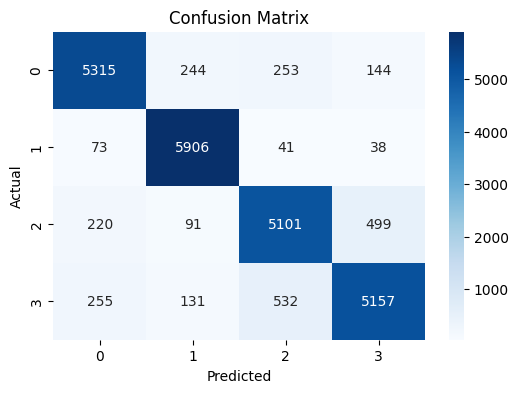

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

In [ ]:
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

Naive Bayes Model Building

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(x_tfidf_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [ ]:
y_pred = nb_model.predict(x_tfidf_test)

In [ ]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.9050416666666666

 Confusion Matrix:
 [[5326  227  282  121]
 [  58 5944   28   28]
 [ 190   64 5181  476]
 [ 230   55  520 5270]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      5956
           1       0.94      0.98      0.96      6058
           2       0.86      0.88      0.87      5911
           3       0.89      0.87      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.91      0.90     24000



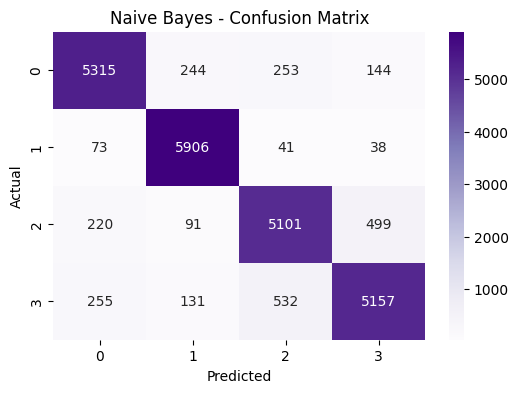

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
with open("nb_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

In [ ]:
#vector save

with open("tfidf_vectorizer.pkl", "wb") as file:
  pickle.dump(tfidf, file)

In [ ]:
# New Data prediction

In [ ]:
with open("nb_model.pkl", "rb") as file:
  model = pickle.load(file)
with open("tfidf_vectorizer.pkl", "rb") as file:
  vectorizer = pickle.load(file)

In [ ]:
text = ["Apple launches new iPhone with advanced features"]

new_text_tfidf = vectorizer.transform(text)

prediction = model.predict(new_text_tfidf)

if prediction[0]==0:
  print("World")
elif prediction[0]==1:
  print("Sports")
elif prediction[0]==2:
  print("Business")
else:
  print("Sci/Tech")

Sci/Tech


# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb = XGBClassifier(n_estimators=100,random_state=42)
model_xgb.fit(x_tfidf_train,y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
y_pred = model_xgb.predict(x_tfidf_test)

In [ ]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.8877083333333333

 Confusion Matrix:
 [[5250  265  232  209]
 [  92 5777   77  112]
 [ 199   88 5091  533]
 [ 221  146  521 5187]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90      5956
           1       0.92      0.95      0.94      6058
           2       0.86      0.86      0.86      5911
           3       0.86      0.85      0.86      6075

    accuracy                           0.89     24000
   macro avg       0.89      0.89      0.89     24000
weighted avg       0.89      0.89      0.89     24000



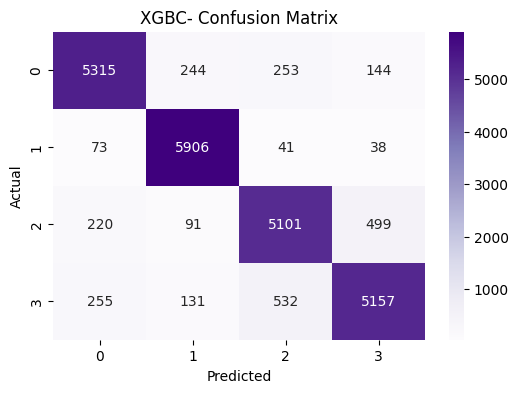

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('XGBC- Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

with open("xgb_model.pkl", "wb") as f:
    pickle.dump(model_xgb, f)

In [ ]:
# Simple RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(max_words, embedding_dim, input_length=max_len))
rnn_model.add(SpatialDropout1D(0.4))
rnn_model.add(SimpleRNN(lstm_out, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(4, activation='softmax'))

rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\Mahalakshmi S\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
rnn_history = rnn_model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
rnn_loss, rnn_accuracy = rnn_model.evaluate(x_test_padded, y_test, verbose=0)
print(f"Simple RNN Test Accuracy: {rnn_accuracy}")

Epoch 1/3
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.6114 - loss: 0.8888 - val_accuracy: 0.8597 - val_loss: 0.4364
Epoch 2/3
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.8569 - loss: 0.4409 - val_accuracy: 0.8678 - val_loss: 0.4022
Epoch 3/3
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.8580 - loss: 0.4317 - val_accuracy: 0.8798 - val_loss: 0.4126
Simple RNN Test Accuracy: 0.8795416951179504


# LSTM

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
max_len = 100
x_train_padded = pad_sequences(x_train_seq, maxlen=max_len)
x_test_padded = pad_sequences(x_test_seq, maxlen=max_len)

In [ ]:
embedding_dim = 128
lstm_out = 192

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax')) # 4 is the number of classes

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 32
epochs = 3

history = model.fit(x_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/3
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 154s 63ms/step - accuracy: 0.8697 - loss: 0.3785 - val_accuracy: 0.9069 - val_loss: 0.2824
Epoch 2/3
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 169s 70ms/step - accuracy: 0.9123 - loss: 0.2625 - val_accuracy: 0.9061 - val_loss: 0.2772
Epoch 3/3
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 153s 64ms/step - accuracy: 0.9219 - loss: 0.2306 - val_accuracy: 0.9092 - val_loss: 0.2721


In [ ]:
loss, accuracy = model.evaluate(x_test_padded, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9067083597183228


In [ ]:
# Accuracy

In [ ]:
print("Naive Bayes Accuracy score:", np.round(accuracy_score(y_test, y_pred), 2))
print("XGBoost Accuracy score:", np.round(accuracy_score(y_test, y_pred), 2))
print("Random Forest Accuracy score:", np.round(accuracy_score(y_test, y_pred), 2))
print(f"LSTM Accuracy: {np.round(accuracy, 2)}")
print(f"Simple RNN Accuracy: {np.round(rnn_accuracy, 2)}")

Naive Bayes Accuracy score: 0.89
XGBoost Accuracy score: 0.89
Random Forest Accuracy score: 0.89
LSTM Accuracy: 0.91
Simple RNN Accuracy: 0.88


In [ ]:

from sklearn.model_selection import GridSearchCV

In [ ]:
nb_model = MultinomialNB()


param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],   # Laplace smoothing
    'fit_prior': [True, False]                   # Whether to learn class prior probabilities
}


grid_nb = GridSearchCV(
    estimator=nb_model,
    param_grid=param_grid_nb,
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,              # Use all CPU cores for speed
    verbose=2               # Shows progress
)

# Fit on training data
grid_nb.fit(x_tfidf_train, y_train)

#  best parameters and best score
print("Best Parameters:", grid_nb.best_params_)
print(" Best Cross-Validation Accuracy:", grid_nb.best_score_)

# Step 6: Evaluate on test set using best model
best_nb_model = grid_nb.best_estimator_
y_pred_nb = best_nb_model.predict(x_tfidf_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best Parameters: {'alpha': 0.1, 'fit_prior': False}
✅ Best Cross-Validation Accuracy: 0.9071666666666667

Confusion Matrix:
 [[5324  222  279  131]
 [  53 5950   28   27]
 [ 186   61 5163  501]
 [ 209   45  492 5329]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91      5956
           1       0.95      0.98      0.96      6058
           2       0.87      0.87      0.87      5911
           3       0.89      0.88      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



In [ ]:
#saved the model useing pickle